<a href="https://colab.research.google.com/github/Juanpa06/Teoria-de-comunicacion-y-procesamiento-de-senales/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab/Proyecto #4

###Estudiantes:


*   Juan Pablo Jiménez Anderson 
*   Gabriel Blanco Mora         
*   Kevin Chinchilla Gómez      



##Importación de librerias



In [ ]:
import matplotlib
import numpy as np
import math
from pylab import *
import random
import scipy.signal as signal
import scipy.stats as stats
from scipy.signal import butter, lfilter, freqz
from scipy.fft import fft, ifft, fft2, ifft2, fftfreq

##Actividad #1

En la primer actividad se busca generar un sistema de modulación por amplitud de pulso digital. Este sistema busca comparar este proceso de modulación ante tres tipos de señales, con tres frecuencias de muestreo distintas y ante 3 anchos de pulso de la señal modulada distintos. Estos parámetros son solicitados al usuario y definidos por este. Finalmente se procede a aplicar un filtro pasa baja para intentar de reconstruir la señal inicial. 

###Transformada de Fourier y definición de parámetros###

Primeramente se define una función que calcula la transformada rápida de Fourier, la cual se utilizará posteriormente cuando se quiera representar la señal modulada en el dominio de la frecuencia. Además se definen parámetros como la cantidad de muestras de las señales en el dominio del tiempo y la frecuencia de los mensajes.

In [ ]:
#Funcion que calcula la transformada de fourier de una señal en el tiempo. Recibe como parámetros un n que representa el rango del dominio de la frecuencia y a la señal s
def transfourier(s,n2):
  
  t = np.linspace(0,T,n2)
  dt = np.diff(t)[0]

  f_FFT = fftfreq(len(t), np.diff(t)[0])
  s_FFT = fft(s)

  f_FFT=f_FFT[:n2//2]
  s_FFT=np.abs(s_FFT[:n2//2])
  return(f_FFT,n2,s_FFT)

###Teorema de muestreo de Nyquist###

El teorema de muestreo de Nyquist afirma que la reconstrucción matemática de una señal de banda limitada es posible si la frecuencia de muestreo es igual o mayor que el doble de su ancho de banda. Comúnmente, también se afirma que la reconstrucción se podrá realizar si la frecuencia de muestreo es el doble de la frecuencia máxima de la señal, es decir la frecuencia fundamental. Se elige arbitrariamente para todas las señales una frecuencia de 60Hz, por lo que, en teoría, cualquier tasa de muestreo mayor a 120Hz debe ser suficiente para posteriormente reconstruir la señal, siempre y cuando esta tenga ancho de banda finito.

In [ ]:
fs=30000                                                                        #Frecuencia de muestreo para calcular la FFT, NO LA DE LA CONVERSION ANALOGICA DIGITAL
T=0.1                                                                           #Tiempo total en el que se graficaran las señales
n=int(T*fs)                                                                     #Numero de muestras totales, son 3000
f_mod=60                                                                        #Frecuencia señales moduladoras (mensaje)

In [ ]:
#En este bloque de código básicamente solo se declaran listas con n elementos, es decir con 3000 elementos 
mod=[]
for i in range(n):
  mod.append(i)
PAM=[]
for i in range(n):
  PAM.append(0)
pulso=[]
for i in range(n):
  pulso.append(i)

###Opciones de frecuencias de muestreo

Basándose en el teorema de Nyquist y considerando que todas las señales tienen una frecuencia fundamental de 60Hz, se implementaron tres opciones de frecuencia de muestreo: 


*   80Hz->Submuestreo porque es menor que el doble de la frecuencia fundamental
*   400Hz-> Frecuencia de muestreo que se considera adecuada porque es mayor que el doble de la frecuencia fundamental.
* 800Hz-> Sobremuestreo porque es mucho mayor que la frecuencia fundamental, aproximadamente 13 veces mayor.



In [ ]:
#Bloque de código que recibe parámetros del usuario, tanto tipo de señal, frecuencia de muestreo y ancho de pulso, y luego grafica resultados en el tiempo y la frecuencia
funcion=input("Ingrese que tipo de función desea, 1 para senoidal, 2 para cuadrada y 3 para triangular") #Imprime las opciones de funciones disponibles para graficar

x=np.linspace(0,T,n,endpoint=True)                                              #Se genera una lista de 3000 elementos, esta lista se refiere al dominio discreto del tiempo

if funcion=="1":                                                                                               
  mod=np.sin(f_mod*2*np.pi*x)                                                   #Función senoidal
elif funcion=="2":                                                                                                      
  mod=signal.square(2 * np.pi * f_mod * x)                                      #Función cuadrada
elif funcion=="3":                                                                                                 
  mod = signal.sawtooth(2 * np.pi * f_mod * x,0.5)                              #Función triangular          
f_mod_FFT,n2_fm,s_mod_FFT=transfourier(mod,300)  


input_muestreo=input("Ingrese la frecuencia de muestreo deseada, 1 para una frecuencia de muestreo adecuada, 2 para submuestreo y 3 para sobremuestreo") 
input_ancho=input("Ingrese el ancho de puslo deseado, 1 para un ancho angosto, 2 para mediana angostura y 3 para un ancho grueso")
if input_muestreo=="1":
  f_muestreo=400
elif input_muestreo=="2":
  f_muestreo=80
elif input_muestreo=="3":
  f_muestreo=800
if input_ancho=="1":
  ancho_pulso=0.0001
elif input_ancho=="2":
  ancho_pulso=0.0005
elif input_ancho=="3":
  ancho_pulso=0.001

T_muestreo=1/f_muestreo

for i in range(n):
  if i <ancho_pulso*n*10:
    pulso[i]=1
  else:
    pulso[i]=0

k_final=int(T/T_muestreo)
j_final=int(n/k_final)
print(T_muestreo)

for k in range(k_final):
  for j in range (j_final):
    if j<int(ancho_pulso*n*10):
      PAM[k*j_final+j]=1*(mod[int(k*T_muestreo*n*10)])
    else:
      PAM[k*j_final+j]=0
f_PAM_FFT,n2_PAM,s_PAM_FFT=transfourier(PAM,300)


fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
fig.set_figwidth(20)
fig.set_figheight(5)
figure, axis = plt.subplots(2,2,figsize=(24,10))
axis[0,0].plot(x, mod)
axis[0,0].set_title("Señal moduladora en el tiempo")
axis[0,1].plot(f_mod_FFT, s_mod_FFT)
axis[0,1].set_title("Señal moduladora en la frecuencia")
axis[1,0].plot(x, PAM)
axis[1,0].set_title("PAM en el tiempo")
axis[1,1].plot(f_PAM_FFT, s_PAM_FFT)
axis[1,1].set_title("PAM en la frecuencia")


###Resultados de la señal PAM en el tiempo y frecuencia


####Comparación entre tipos de señales con frecuencia de muestreo adecuada y ancho de pulso mediano.

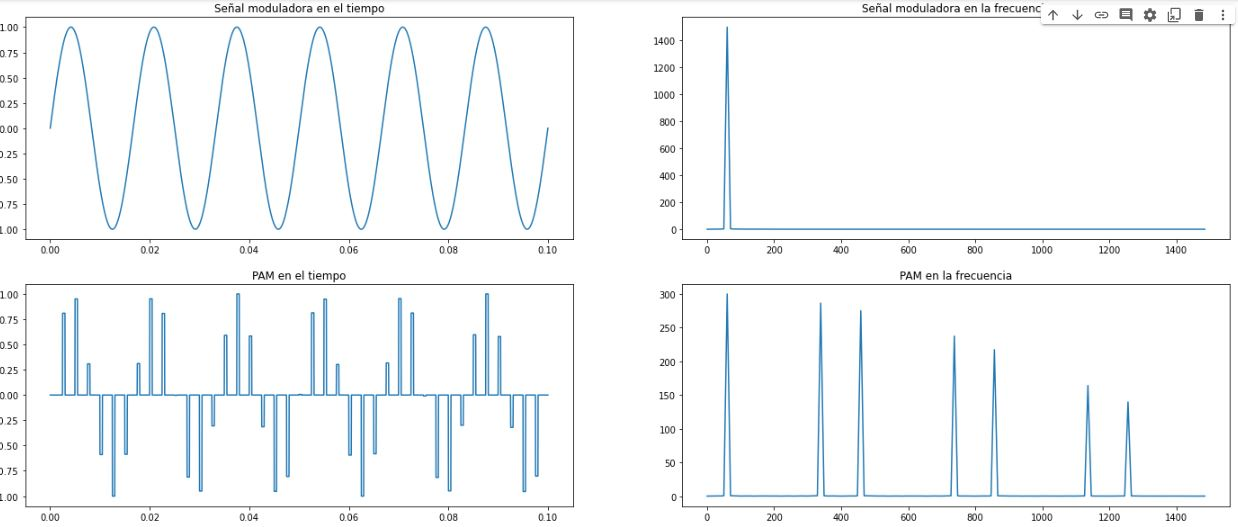

En el primer caso, para la señal senoidal, se puede afirmar que al pasarla por un LPF con una frecuencia de corte 70Hz se podrá reconstruir de manera prácticamente perfecta la señal senoidal original, que simplemente se compone por la frecuencia fundamental de 60Hz. Esto se debe a que el teorema de Nyquist se aplica de manera correcta y además a que la señal original es de banda limitada, lo cual no sucede con la triangular y la cuadrada, por lo cual estas no se pueden reconstruir por completo aunque se aplique el teorema de Nyquist. 

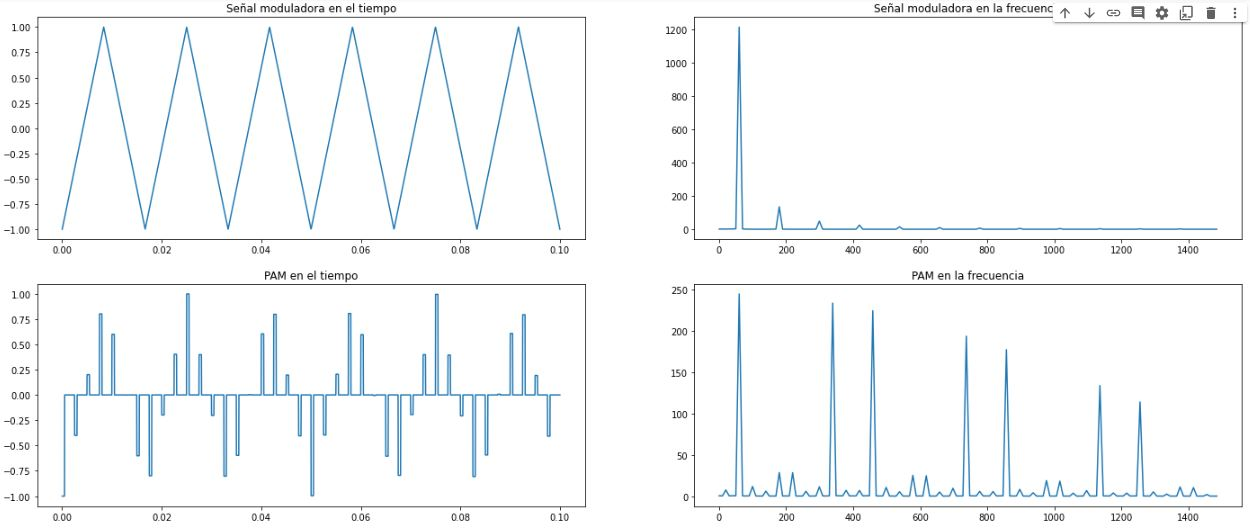

En el segundo caso, debido a que la señal triangular tiene un ancho de banda que es bastante más extenso, la señal no se podrá reconstruir de manera perfecta aplicando el LPF, pero se puede afirmar que muy probablemente como la magnitud de los armónicos decrece mucho más aceleradamente que en el próximo caso a analizar, la señal cuadrada, se obtendrá una apoximación aceptable al reconstruir la señal.

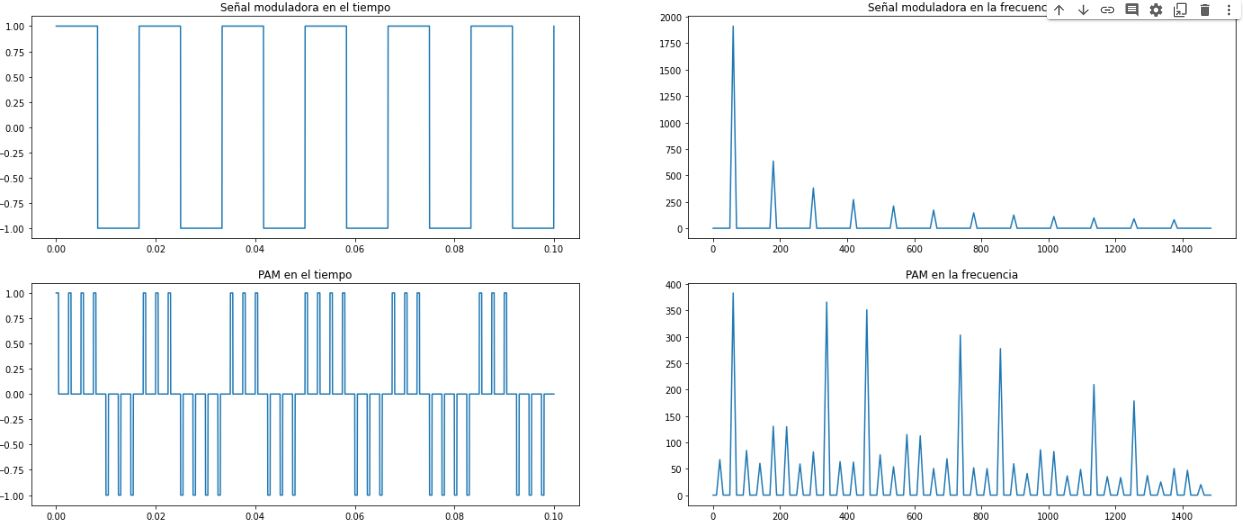

En el último caso al aplicar un LPF a la PAM no se obtendrá algo similar a la señal original, esto porque de las tres señales esta es la que menos se puede aproximar a un ancho de banda finito.

####Comparación de las distintas frecuencias de muestreo manteniendo el ancho de pulso mediano.

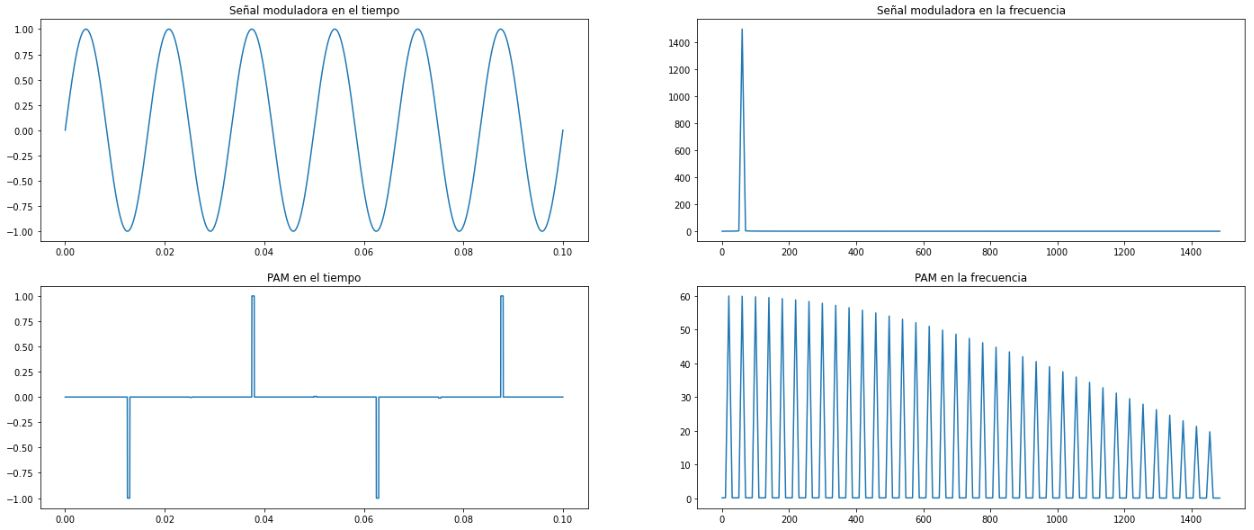

En el primer caso se presenta un caso de submuestreo. La frecuencia de muestreo es bastante menor que dos veces la frecuencia de la senoidal, por lo que la señal no se podrá reconstruir posteriormente. Al aplicar un LPF a la gráfica de la PAM en la frecuencia se van a mantener señales de frecuencias no deseadas,inclusive de frecuencias más elevadas que la fundamental. 

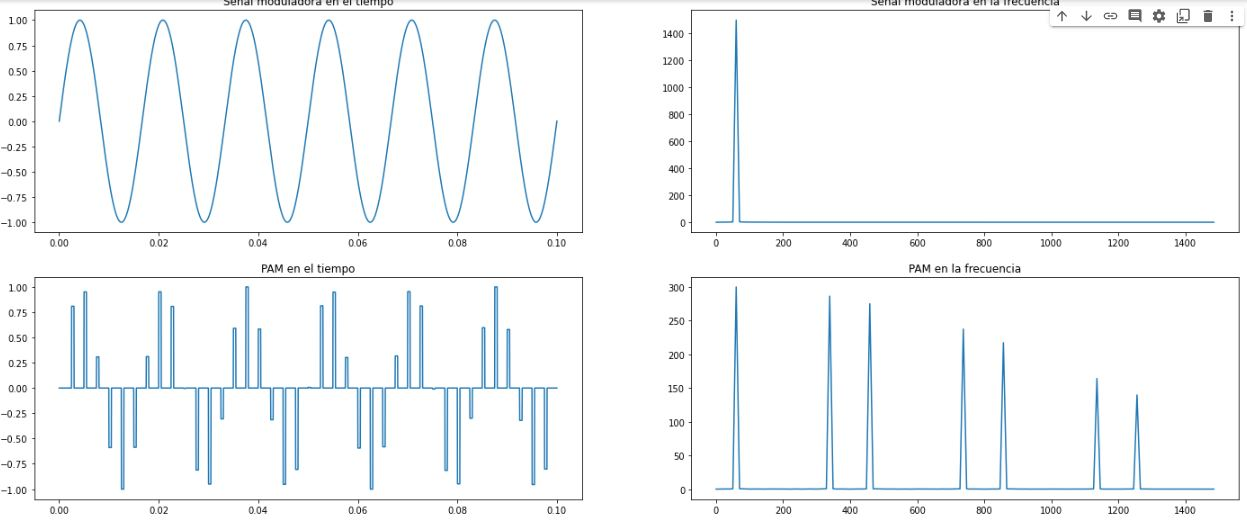

En este caso se tiene una frecuencia de muestreo adecuada. El filtrado con un LPF y una frecuencia de corte adecuada podrá eliminar los armónicos de la PAM en la frecuencia de manera prácticamente perfecta, lo cual podrá hacer que se reconstruya la señal de manera perfecta, debido a que se aplica el teorema de nyquist y la señal es de banda limitada. 

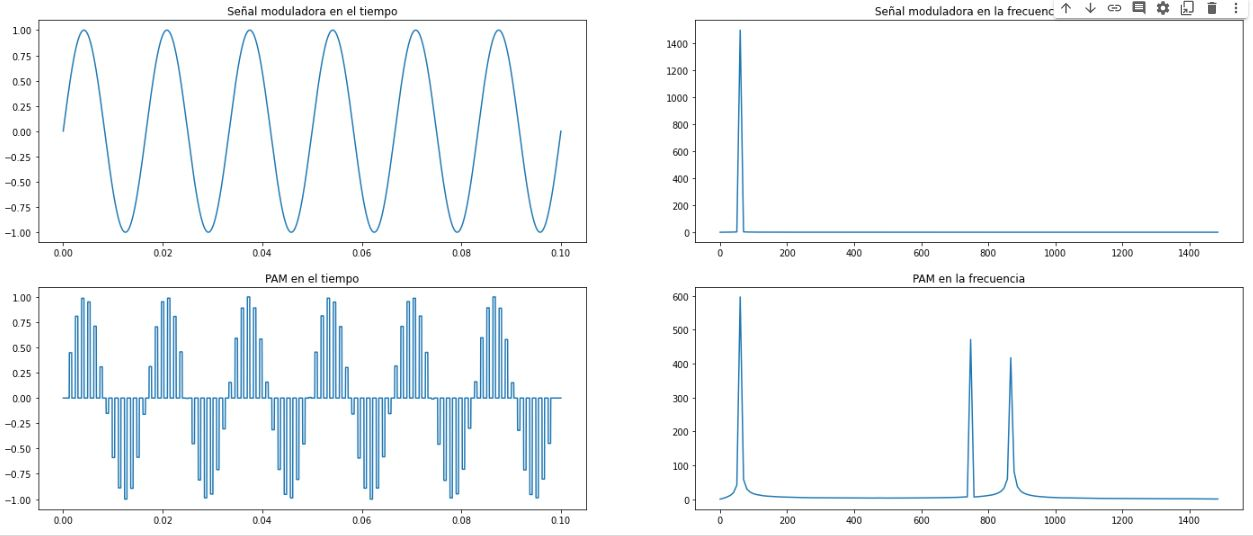

En este caso, se tiene una frecuencia de muestreo mayor que el doble de ancho de banda de la señal original, la cual tiene ancho de banda finito, entonces, al igual que en el caso anterior, se puede reconstruir perfectamente la señal. De hecho, se puede observar en el espectro de la frecuencia de la señal PAM, se observa como el proceso de filtrado puede ser aún más impreciso en términos de filtros no ideales y frecuencias de corte, y aún así se reconstruirá la señal, sin embargo, no es necesaria la frecuencia tan elevada.

### Comparación de distintos anchos de pulso ante una frecuencia de muestreo adecuada

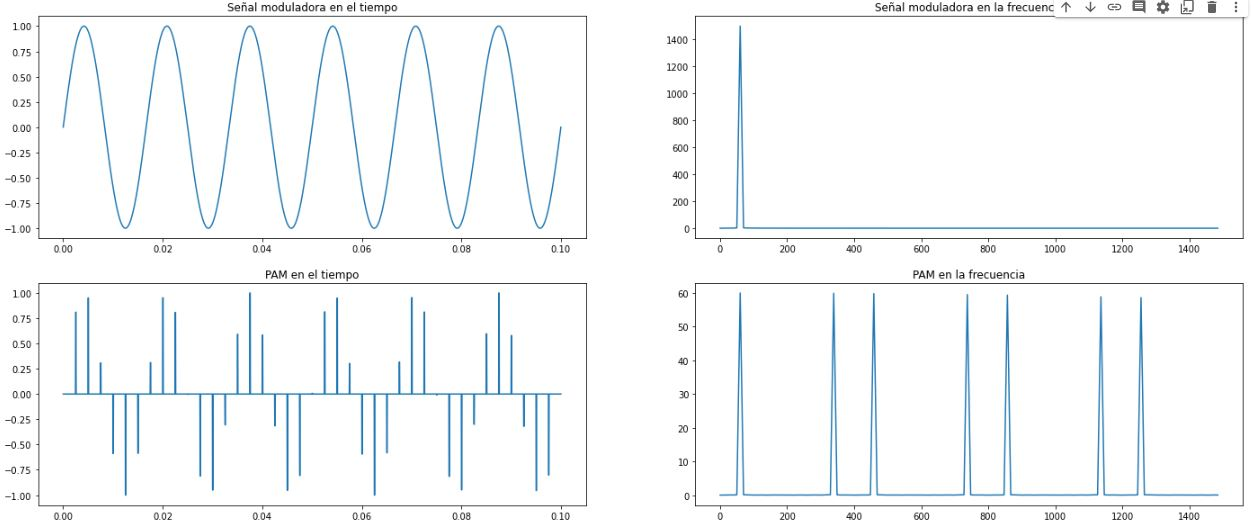

Un ancho de pulso pequeño se traduce en el espectro de la frecuencia a armónicos con mayor magnitud, sin embargo si se aplica un buen filtro para eliminar estos armónicos se debe poder obtener la señal original sin problemas. 

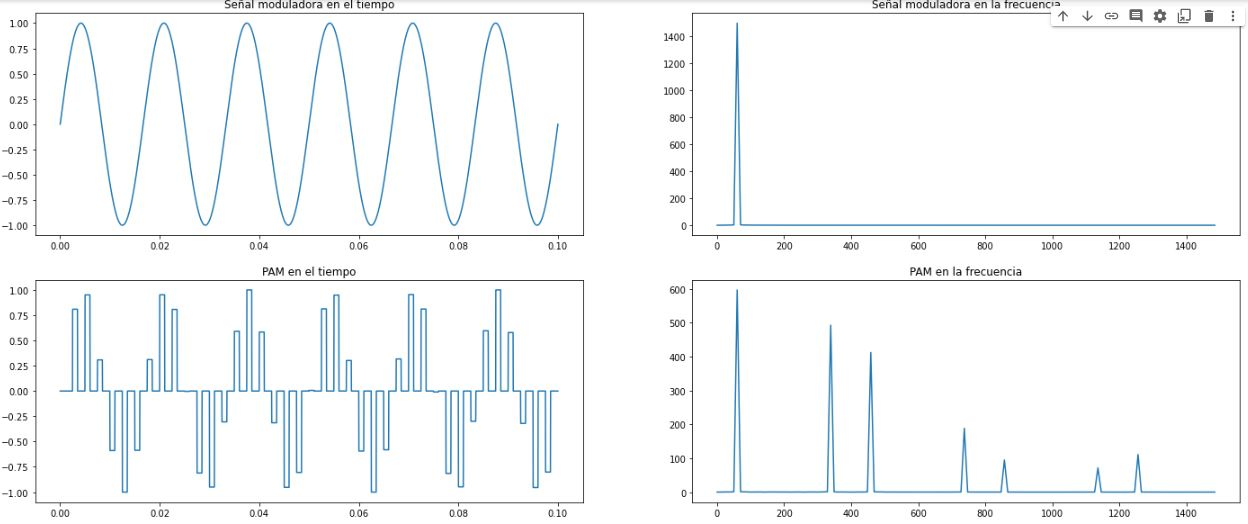

Un ancho de pulos mayor hace que los armónicos que aparecen en el espectro de la frecuencia disminuyan de magnitud a una velocidad bastante mayor, por lo cual el proceso de filtrado será más sencillo. En ambos casos se puede reconstruir la señal, con un ancho de pulso pequeño o grande. En el caso de un ancho de pulso mediano la magnitud de los armónicos decrece según se aumenta en frecuencia con una velocidad media entre el ancho de pulso angosto y el más grande. 

###Filtrado y reconstrucción de la señal

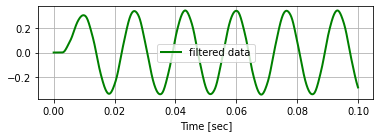

In [ ]:
#Filtro y reconstrucción de señal
#Se asignan valores a la frecuancia de corte y al orden, según la función escogida en la etapa anterior.
if funcion == "1":
  cutoff= 70 #Frecuencia de corte del filtro 
  order= 3
elif funcion == "2":
  cutoff= 125  
  order= 4
else:
  cutoff= 150  
  order= 4

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
butter_lowpass(500,fs)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

b, a = butter_lowpass(cutoff, fs, order)

y = butter_lowpass_filter(PAM, cutoff, fs, order)
x=np.linspace(0,T,n,endpoint=False) 

plt.subplot(2, 1, 2)
plt.plot(x, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

####Análisis de resultados

Dependiendo de la señal moduladora utilizada, los resultados varía de forma significativa.


*   Señal senoidal: Su reconstrucción después de la etapa de filtrado se consigue aproximadamente de forma adecuada. Esto debido a que en el espectro de la señal PAM, se distingue perfectamente cual es la componente de la señal senoidal y por ende es fácil de filtrar.
*   Señal cuadrada: Su reconstrucción no es sencilla, inclusive no se consigue obtener la misma señal cuadrada. Esto se debe a que en el espectro de la señal PAM, las componentes de la señal cuadrada se "mezclan" con otras que al momento del filtrado resultan difíciles de eliminar.
*   Señal triangular:Su reconstrucción no es sencilla, no se consigue obtener exactamente la misma señal, pero si se consigue una mejor aproximación que en el caso de la señal cuadrada. En este caso, se presenta de nuevo el fenómeno de que en el espectro de la señal PAM, las componentes de la señal triangular se "mezclan" con otras que no pueden ser eliminadas en la etapa de filtrado.

Debido a lo anterior, se intentó escoger la frecuencia de corte y el orden adecuados dependiendo de la señal moduladora seleccionada por el usuario.







##Actividad #2


###Función generadora de señal
Se crea una función generadora de señales con atributos de entrada:


*   freq: frecuencia de la señal en Hz
*   amp: amplitud de la señal


In [ ]:
def generator(freq, amp):
  x = np.linspace(0,20,10000,endpoint=True)                                     # Señal va de -T a T en x con un muestreo de 10000                        
  y_cos = amp * np.cos(2*np.pi*freq*x)                                          # Señal
  y_sin = amp * np.sin(2*np.pi*freq*x)                                          # Señal con 90 deg de retraso
  y_f = amp * np.cos(2*np.pi*freq/2*x) 


  #Ploteo de la gráfica
  #f = plt.figure()
  #f.set_figwidth(24)
  #f.set_figheight(5)
  #plt.plot(x,y_cos)
  #plt.plot(x,y_sin)
  #plt.show()
  return(x, y_cos, y_sin, y_f)


###Generación de señal de entrada
Se define la señal como una función a trozos, la cual varía su amplitud de cero a uno en función del tiempo, se asume que el cambio de valor de bit ocurre cada segundo, por lo que la gráfica va de cero a 20 segundos.

In [ ]:
x= np.linspace(0, 20, 10000)
y_i = np.piecewise(x, [ (x == 0), (x >= 0) & (x <= 1), (x >= 1) & (x <= 5),     # Definición de función a trozos
                     (x >= 5) & (x <= 6), (x >= 6) & (x <= 8), 
                     (x >= 8) & (x <= 10), (x >= 10) & (x <= 11), 
                     (x >= 11) & (x <= 12), (x >= 12) & (x <= 13),
                     (x >= 13) & (x <= 18), (x >= 18) & (x <= 19), 
                     (x >= 19) & (x <= 20) ], [0, lambda x: 1, lambda x: 0,
                                               lambda x: 1, lambda x: 0, 
                                               lambda x: 1, lambda x: 0, 
                                               lambda x: 1, lambda x: 0, 
                                               lambda x: 1, lambda x: 0, 
                                               lambda x: 1])
#print(x)
#print(y_i)


Ahora, se genera la función moduladora para la señal en cuestión, dado el lapso de tiempo bajo análisis (20 s), se toma una señal moduladora de 2 Hz de manera que esta permita observar de una forma más conveniente el efecto de la modulación.

In [ ]:
xm, ym_cos, ym_sin,  ym_f = generator(2, 1)

###ASK
ASK, por sus siglas en inglés Amplitude Shifting Keying es una forma de modulación digital en la cual, los datos son representados como amplitud en la amplitud de onda, dado que se tienen valores binarios, esto permite entender la modulación como una relación encendido-apagado, en donde 1 se representa como la ceñal moduladora encendida y el cero como la señal apagada, tal y como se aprecia  en la imágen posterior

In [ ]:
n = 0
y_a = []
for value in y_i:
  if value == 0:
    y_a.append(0)
  elif value == 1:
    y_a.append(ym_cos[n])
  n = n + 1

###PSK
Es una forma de modulaci'on digital angular que, lo que hace es variar la fasr de la seal portadora entre un número de valores discretos, para el caso en análisis, 2 valores, 0 y 1, dicha variación invierte la señal en el caso de haber un 0, y si el valor es 1, la señal permanece tal cual lo dicta la portadora

In [ ]:
n = 0
y_p = []
for value in y_i:
  if value == 0:
    y_p.append(-ym_cos[n])
  elif value == 1:
    y_p.append(ym_cos[n])
  n = n + 1

###FSK
Tipo de modulación digital con CWM, que recibe una señal con valores binarios (información).  Para el caso de FSK (Frecuency Shift Keying) se tiene dos frecuencias (con nombres "f1"  y "f2", para ejemplificar), cuando la señal de entrada se encuentra en cero la señal de salida de FSK tiene una frecuencia (f1) y cuando la señal de entrada se encuentra en uno la señal de salida de FSK tiene la otra frecuencia (f2).

In [ ]:
n = 0
y_f = []
for value in y_i:
  if value == 0:
    y_f.append(ym_f[n])
  elif value == 1:
    y_f.append(ym_cos[n])
  n = n + 1

###Ploteo de las gráficas

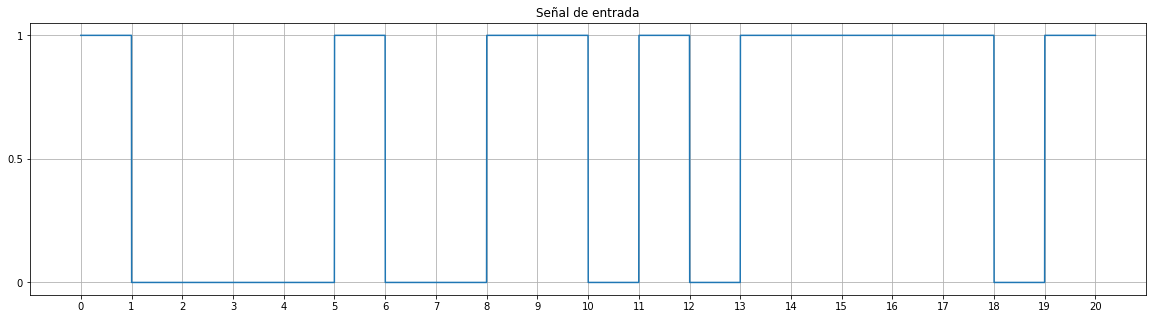

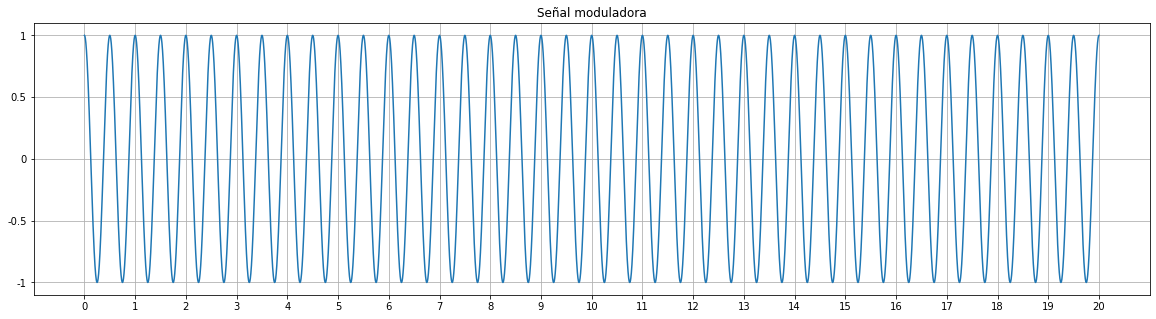

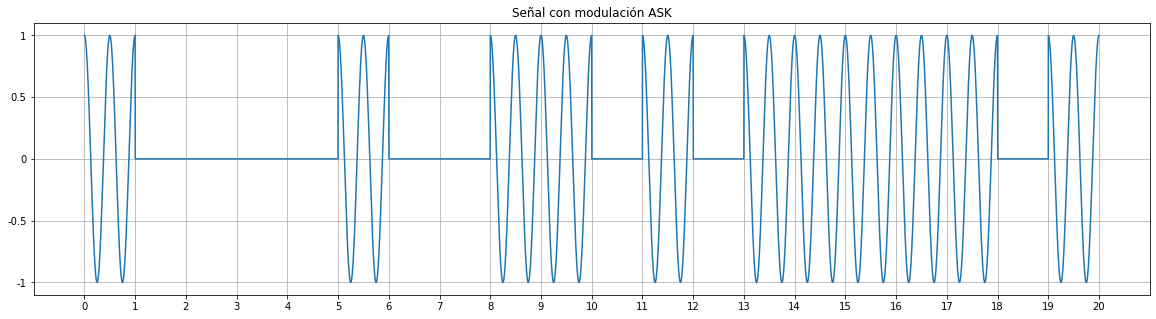

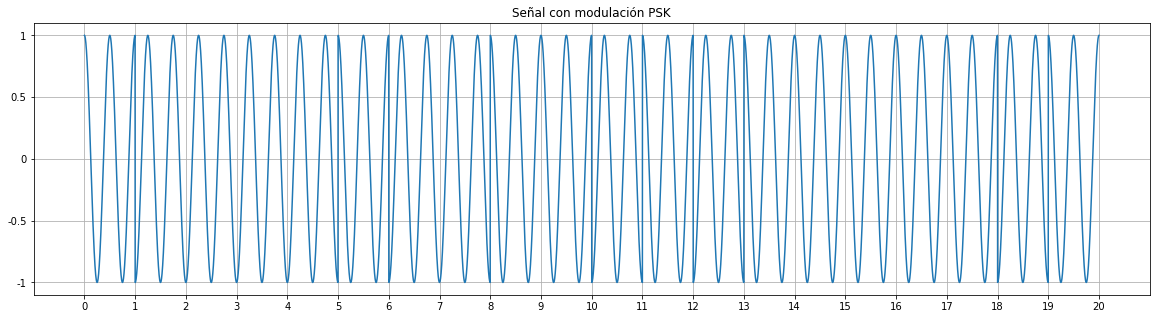

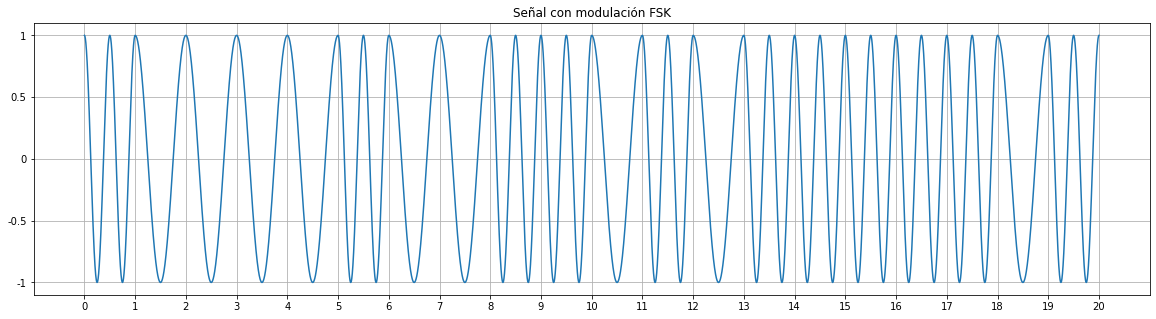

In [ ]:
fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de la señal de entrada
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(x, y_i)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
           [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([0, 0.5, 1],[0, 0.5, 1])
plt.grid()
plt.title("Señal de entrada")
plt.show()

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de la señal moduladora
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(x, ym_cos)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
           [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([-1, -0.5, 0, 0.5, 1],[-1, -0.5, 0, 0.5, 1])
plt.grid()
plt.title("Señal moduladora")
plt.show()

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de la señal ASK
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(x, y_a)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
           [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([-1, -0.5, 0, 0.5, 1],[-1, -0.5, 0, 0.5, 1])
plt.grid()
plt.title("Señal con modulación ASK")
plt.show()

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de la señal PSK
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(x, y_p)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
           [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([-1, -0.5, 0, 0.5, 1],[-1, -0.5, 0, 0.5, 1])
plt.grid()
plt.title("Señal con modulación PSK")
plt.show()

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de la señal FSK
fig.set_figwidth(20)
fig.set_figheight(5)
plt.plot(x, y_f)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
           [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([-1, -0.5, 0, 0.5, 1],[-1, -0.5, 0, 0.5, 1])
plt.grid()
plt.title("Señal con modulación FSK")
plt.show()